EDA

data from two sites: air and hpg
dates from: 2016 to April 2017
test set: last week of April and May of 2017


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
air_reserve = pd.read_csv('input/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])

In [3]:
hpg_reserve = pd.read_csv('input/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])

In [4]:
#hpg or air store info: store id, genre name, area name, lat, long.
air_store_info = pd.read_csv('input/air_store_info.csv')
hpg_store_info = pd.read_csv('input/hpg_store_info.csv')

In [5]:
#allows you to join select restaurants that have both the air and hpg system
store_relation = pd.read_csv('input/store_id_relation.csv')

In [6]:
date_info = pd.read_csv('input/date_info.csv',parse_dates=['calendar_date'])

In [7]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [8]:
# historical visit data for the air restaurants.
air_visit = pd.read_csv('input/air_visit_data.csv',parse_dates=['visit_date'])

In [9]:
sample_submission = pd.read_csv('input/sample_submission.csv')

In [10]:
def numeric_EDA(df):
    print("col types: \n")
    print(df.info())
    print("\n check head: \n")
    print(df.head())
    print("\n stat summary: \n")
    print(df.describe())
    print("\n check if any null/nan value: ")
    print(df.isnull().values.any()) 
    if df.isnull().values.any():
        print("\n if nan present, sum-up all nan's: ")
        print(df.isnull().sum())

In [11]:
#numeric_EDA(air_reserve)

In [12]:
#numeric_EDA(hpg_reserve)

In [13]:
#numeric_EDA(air_store_info)

In [14]:
#numeric_EDA(hpg_store_info)

In [15]:
#numeric_EDA(air_visit)

In [16]:
#numeric_EDA(date_info)

In [17]:
#numeric_EDA(store_relation)

In [18]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [19]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [20]:
hpg_reserve['visit_year'] = hpg_reserve['visit_datetime'].dt.year
hpg_reserve['visit_month'] = hpg_reserve['visit_datetime'].dt.month
hpg_reserve['visit_day'] = hpg_reserve['visit_datetime'].dt.day
hpg_reserve['reserve_year'] = hpg_reserve['reserve_datetime'].dt.year
hpg_reserve['reserve_month'] = hpg_reserve['reserve_datetime'].dt.month
hpg_reserve['reserve_day'] = hpg_reserve['reserve_datetime'].dt.day


In [21]:
hpg_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)


In [22]:
hpg_reserve = hpg_reserve.groupby(['hpg_store_id', 'visit_year', 'visit_month',\
                                   'visit_day','reserve_year','reserve_month','reserve_day'], as_index=False).sum()
hpg_reserve.head()

,hpg_store_id,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors
0,hpg_001112ef76b9802c,2016,2,26,2016,2,9,9
1,hpg_001112ef76b9802c,2016,3,17,2016,3,3,3
2,hpg_001112ef76b9802c,2016,3,31,2016,3,25,5
3,hpg_001112ef76b9802c,2016,4,5,2016,4,1,13
4,hpg_001112ef76b9802c,2016,4,18,2016,4,15,9


In [23]:
air_reserve['visit_year'] = air_reserve['visit_datetime'].dt.year
air_reserve['visit_month'] = air_reserve['visit_datetime'].dt.month
air_reserve['visit_day'] = air_reserve['visit_datetime'].dt.day
air_reserve['reserve_year'] = air_reserve['reserve_datetime'].dt.year
air_reserve['reserve_month'] = air_reserve['reserve_datetime'].dt.month
air_reserve['reserve_day'] = air_reserve['reserve_datetime'].dt.day

air_reserve.drop(['visit_datetime','reserve_datetime'], axis=1, inplace=True)

date_info['calendar_year'] = date_info['calendar_date'].dt.year
date_info['calendar_month'] = date_info['calendar_date'].dt.month
date_info['calendar_day'] = date_info['calendar_date'].dt.day

date_info.drop(['calendar_date'], axis=1, inplace=True)

air_visit['visit_year'] = air_visit['visit_date'].dt.year
air_visit['visit_month'] = air_visit['visit_date'].dt.month
air_visit['visit_day'] = air_visit['visit_date'].dt.day

#air_visit.drop(['visit_date'], axis=1, inplace=True)

In [24]:
air_reserve.head()

,air_store_id,reserve_visitors,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day
0,air_877f79706adbfb06,1,2016,1,1,2016,1,1
1,air_db4b38ebe7a7ceff,3,2016,1,1,2016,1,1
2,air_db4b38ebe7a7ceff,6,2016,1,1,2016,1,1
3,air_877f79706adbfb06,2,2016,1,1,2016,1,1
4,air_db80363d35f10926,5,2016,1,1,2016,1,1


In [25]:
hpg_reserve = pd.merge(hpg_reserve, store_relation, on='hpg_store_id', how='inner')
hpg_reserve.drop(['hpg_store_id'], axis=1, inplace=True)
hpg_reserve.head()


,visit_year,visit_month,visit_day,reserve_year,reserve_month,reserve_day,reserve_visitors,air_store_id
0,2016,1,9,2016,1,7,2,air_cbe867adcf44e14f
1,2016,1,11,2016,1,10,8,air_cbe867adcf44e14f
2,2016,1,14,2016,1,6,11,air_cbe867adcf44e14f
3,2016,1,15,2016,1,13,8,air_cbe867adcf44e14f
4,2016,1,18,2016,1,15,9,air_cbe867adcf44e14f


In [26]:
air_reserve = pd.concat([air_reserve, hpg_reserve])
air_reserve.head()

,air_store_id,reserve_day,reserve_month,reserve_visitors,reserve_year,visit_day,visit_month,visit_year
0,air_877f79706adbfb06,1,1,1,2016,1,1,2016
1,air_db4b38ebe7a7ceff,1,1,3,2016,1,1,2016
2,air_db4b38ebe7a7ceff,1,1,6,2016,1,1,2016
3,air_877f79706adbfb06,1,1,2,2016,1,1,2016
4,air_db80363d35f10926,1,1,5,2016,1,1,2016


In [27]:
air_reserve = air_reserve.groupby(['air_store_id', 'visit_year', 'visit_month','visit_day'],\
                as_index=False).sum().drop(['reserve_day','reserve_month','reserve_year'], axis=1)
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors
0,air_00a91d42b08b08d9,2016,1,14,2
1,air_00a91d42b08b08d9,2016,1,15,4
2,air_00a91d42b08b08d9,2016,1,16,2
3,air_00a91d42b08b08d9,2016,1,22,2
4,air_00a91d42b08b08d9,2016,1,29,5


In [28]:
air_reserve = pd.merge(air_reserve, date_info, left_on=['visit_year','visit_month','visit_day'], right_on=['calendar_year','calendar_month','calendar_day'], how='left')
air_reserve.drop(['calendar_year','calendar_month','calendar_day'], axis=1, inplace=True)
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0


In [29]:
air_reserve = pd.merge(air_reserve, air_store_info, on='air_store_id', how='left')
air_reserve.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [30]:
air_visit.head()

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day
0,air_ba937bf13d40fb24,2016-01-13,25,2016,1,13
1,air_ba937bf13d40fb24,2016-01-14,32,2016,1,14
2,air_ba937bf13d40fb24,2016-01-15,29,2016,1,15
3,air_ba937bf13d40fb24,2016-01-16,22,2016,1,16
4,air_ba937bf13d40fb24,2016-01-18,6,2016,1,18


In [31]:
df = pd.merge(air_reserve, air_visit, on=['air_store_id','visit_year','visit_month','visit_day'], how='left')

In [32]:
df.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,visit_date,visitors
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 13 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
day_of_week         42193 non-null object
holiday_flg         42193 non-null int64
air_genre_name      42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visit_date          35698 non-null datetime64[ns]
visitors            35698 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 4.5+ MB


In [34]:
df.air_genre_name = df.air_genre_name.replace(' ', '_', regex=True)
df.air_genre_name = df.air_genre_name.replace('/', '_', regex=True)
df=df.rename(columns = {'air_genre_name':'genre','day_of_week':'dow'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 13 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
dow                 42193 non-null object
holiday_flg         42193 non-null int64
genre               42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visit_date          35698 non-null datetime64[ns]
visitors            35698 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 4.5+ MB


In [35]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
df['air_store_id2'] = lbl.fit_transform(df['air_store_id'])

In [38]:
df.air_store_id2.nunique()

333

In [39]:
df['lon_plus_lat'] = df['longitude'] + df['latitude'] 
df.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visit_date,visitors,air_store_id2,lon_plus_lat
0,air_00a91d42b08b08d9,2016,1,14,2,Thursday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN,0,175.447598
1,air_00a91d42b08b08d9,2016,1,15,4,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN,0,175.447598
2,air_00a91d42b08b08d9,2016,1,16,2,Saturday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN,0,175.447598
3,air_00a91d42b08b08d9,2016,1,22,2,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN,0,175.447598
4,air_00a91d42b08b08d9,2016,1,29,5,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,NaT,NaN,0,175.447598


In [43]:
df['air_area_name2'] = lbl.fit_transform(df['air_area_name'])
df.air_area_name2.nunique()

72

In [44]:
df['dow2'] = lbl.fit_transform(df['dow'])
df.dow2.nunique()

7

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42193 entries, 0 to 42192
Data columns (total 17 columns):
air_store_id        42193 non-null object
visit_year          42193 non-null int64
visit_month         42193 non-null int64
visit_day           42193 non-null int64
reserve_visitors    42193 non-null int64
dow                 42193 non-null object
holiday_flg         42193 non-null int64
genre               42193 non-null object
air_area_name       42193 non-null object
latitude            42193 non-null float64
longitude           42193 non-null float64
visit_date          35698 non-null datetime64[ns]
visitors            35698 non-null float64
air_store_id2       42193 non-null int64
lon_plus_lat        42193 non-null float64
air_area_name2      42193 non-null int64
dow2                42193 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(8), object(4)
memory usage: 5.8+ MB


In [46]:
df_t = df[df.visitors.notnull()]
df_t.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visit_date,visitors,air_store_id2,lon_plus_lat,air_area_name2,dow2
26,air_00a91d42b08b08d9,2016,7,1,1,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-01,35.0,0,175.447598,33,0
27,air_00a91d42b08b08d9,2016,7,6,7,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-06,29.0,0,175.447598,33,6
28,air_00a91d42b08b08d9,2016,7,8,9,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-08,42.0,0,175.447598,33,0
29,air_00a91d42b08b08d9,2016,7,9,6,Saturday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-09,11.0,0,175.447598,33,2
30,air_00a91d42b08b08d9,2016,7,13,4,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-13,36.0,0,175.447598,33,6


In [47]:
df.shape

(42193, 17)

In [48]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35698 entries, 26 to 42192
Data columns (total 17 columns):
air_store_id        35698 non-null object
visit_year          35698 non-null int64
visit_month         35698 non-null int64
visit_day           35698 non-null int64
reserve_visitors    35698 non-null int64
dow                 35698 non-null object
holiday_flg         35698 non-null int64
genre               35698 non-null object
air_area_name       35698 non-null object
latitude            35698 non-null float64
longitude           35698 non-null float64
visit_date          35698 non-null datetime64[ns]
visitors            35698 non-null float64
air_store_id2       35698 non-null int64
lon_plus_lat        35698 non-null float64
air_area_name2      35698 non-null int64
dow2                35698 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(8), object(4)
memory usage: 4.9+ MB


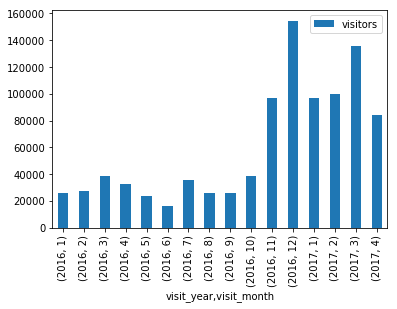

In [49]:
df_t[['visit_month','visitors','visit_year']].groupby(['visit_year','visit_month']).sum().plot(kind ="bar", y='visitors')

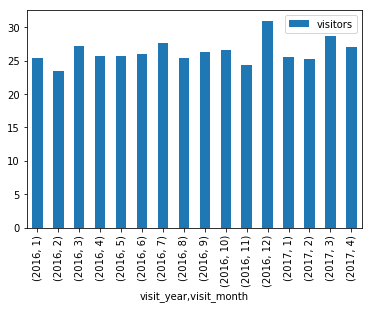

In [50]:
df_t[['visit_month','visitors','visit_year']].groupby(['visit_year','visit_month']).mean().plot(kind ="bar", y='visitors')

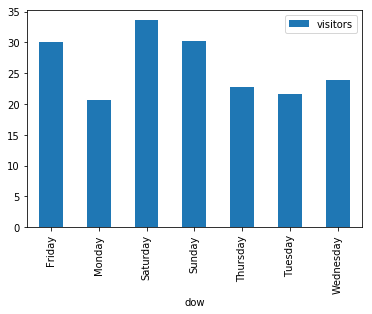

In [51]:
df_t[['visitors','dow']].groupby(['dow']).mean().plot(kind ="bar", y='visitors')

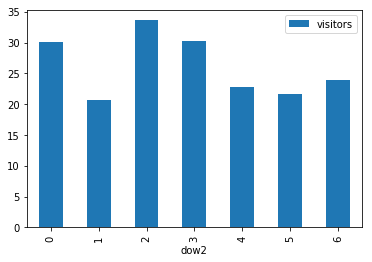

In [52]:
df_t[['visitors','dow2']].groupby(['dow2']).mean().plot(kind ="bar", y='visitors')

In [53]:
df_t.dow.unique()

array(['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Tuesday',
       'Sunday'], dtype=object)

In [54]:
df_t.dow2.unique()

array([0, 6, 2, 4, 1, 5, 3])

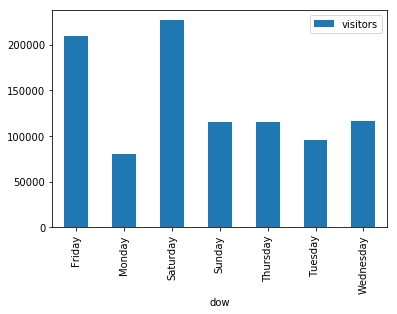

In [55]:
df_t[['visitors','dow']].groupby(['dow']).sum().plot(kind ="bar", y='visitors')

In [56]:
df_t.head(2)

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visit_date,visitors,air_store_id2,lon_plus_lat,air_area_name2,dow2
26,air_00a91d42b08b08d9,2016,7,1,1,Friday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-01,35.0,0,175.447598,33,0
27,air_00a91d42b08b08d9,2016,7,6,7,Wednesday,0,Italian_French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,2016-07-06,29.0,0,175.447598,33,6


In [57]:
df_t = pd.get_dummies(df_t, columns=['genre'])
df_t.drop(['air_store_id','air_area_name','latitude','longitude','dow','reserve_visitors'], axis=1, inplace=True)
df_t.head()

,visit_year,visit_month,visit_day,holiday_flg,visit_date,visitors,air_store_id2,lon_plus_lat,air_area_name2,dow2,...,genre_Dining_bar,genre_International_cuisine,genre_Italian_French,genre_Izakaya,genre_Japanese_food,genre_Karaoke_Party,genre_Okonomiyaki_Monja_Teppanyaki,genre_Other,genre_Western_food,genre_Yakiniku_Korean_food
26,2016,7,1,0,2016-07-01,35.0,0,175.447598,33,0,...,0,0,1,0,0,0,0,0,0,0
27,2016,7,6,0,2016-07-06,29.0,0,175.447598,33,6,...,0,0,1,0,0,0,0,0,0,0
28,2016,7,8,0,2016-07-08,42.0,0,175.447598,33,0,...,0,0,1,0,0,0,0,0,0,0
29,2016,7,9,0,2016-07-09,11.0,0,175.447598,33,2,...,0,0,1,0,0,0,0,0,0,0
30,2016,7,13,0,2016-07-13,36.0,0,175.447598,33,6,...,0,0,1,0,0,0,0,0,0,0


In [58]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35698 entries, 26 to 42192
Data columns (total 24 columns):
visit_year                            35698 non-null int64
visit_month                           35698 non-null int64
visit_day                             35698 non-null int64
holiday_flg                           35698 non-null int64
visit_date                            35698 non-null datetime64[ns]
visitors                              35698 non-null float64
air_store_id2                         35698 non-null int64
lon_plus_lat                          35698 non-null float64
air_area_name2                        35698 non-null int64
dow2                                  35698 non-null int64
genre_Asian                           35698 non-null uint8
genre_Bar_Cocktail                    35698 non-null uint8
genre_Cafe_Sweets                     35698 non-null uint8
genre_Creative_cuisine                35698 non-null uint8
genre_Dining_bar                      35698 non-nul

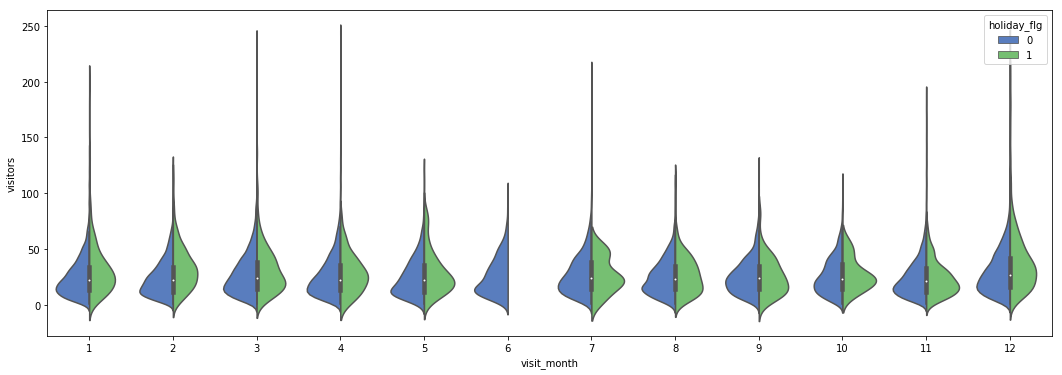

In [60]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(18,6));
ax = sns.violinplot(x='visit_month', y="visitors", hue='holiday_flg',data=df, palette="muted", split=True)

In [61]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [63]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35698 entries, 26 to 42192
Data columns (total 24 columns):
visit_year                            35698 non-null int64
visit_month                           35698 non-null int64
visit_day                             35698 non-null int64
holiday_flg                           35698 non-null int64
visit_date                            35698 non-null datetime64[ns]
visitors                              35698 non-null float64
air_store_id2                         35698 non-null int64
lon_plus_lat                          35698 non-null float64
air_area_name2                        35698 non-null int64
dow2                                  35698 non-null int64
genre_Asian                           35698 non-null uint8
genre_Bar_Cocktail                    35698 non-null uint8
genre_Cafe_Sweets                     35698 non-null uint8
genre_Creative_cuisine                35698 non-null uint8
genre_Dining_bar                      35698 non-nul

In [64]:
X_t = df_t.drop(['visitors','visit_date'], axis=1)
y_t = df_t['visitors']

In [65]:
X_t.head()

,visit_year,visit_month,visit_day,holiday_flg,air_store_id2,lon_plus_lat,air_area_name2,dow2,genre_Asian,genre_Bar_Cocktail,...,genre_Dining_bar,genre_International_cuisine,genre_Italian_French,genre_Izakaya,genre_Japanese_food,genre_Karaoke_Party,genre_Okonomiyaki_Monja_Teppanyaki,genre_Other,genre_Western_food,genre_Yakiniku_Korean_food
26,2016,7,1,0,0,175.447598,33,0,0,0,...,0,0,1,0,0,0,0,0,0,0
27,2016,7,6,0,0,175.447598,33,6,0,0,...,0,0,1,0,0,0,0,0,0,0
28,2016,7,8,0,0,175.447598,33,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29,2016,7,9,0,0,175.447598,33,2,0,0,...,0,0,1,0,0,0,0,0,0,0
30,2016,7,13,0,0,175.447598,33,6,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [67]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
y_pred = regr.predict(X_test)

In [70]:
y_test = y_test.values

In [72]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred))))

RMSE: 0.588797878118


In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, 
                      max_depth =10)


In [91]:
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

In [84]:
print('R2:', metrics.r2_score(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred_gbr))


R2: 0.460708284542
R2: 0.443017793185


In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [86]:
print('R2:', metrics.r2_score(y_test, y_pred_knn))


R2: 0.301983783652


In [73]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(max_iter=1000, alpha=0.3, l1_ratio=0.8)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
predictions = enet.predict(X_test)

In [75]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(predictions))))

RMSE: 0.794878890533


In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predictions = lm.predict(X_test)

In [77]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(lm_predictions))))

RMSE: 0.784190091078


In [78]:
print('R2:', metrics.r2_score(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, predictions))
print('R2:', metrics.r2_score(y_test, lm_predictions))

R2: 0.460708284542
R2: 0.0360925384326
R2: 0.0508531349624


In [79]:
print('EVS:', metrics.explained_variance_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

EVS: 0.0360925795298
MAE: 13.6627865942
MSE: 313.977304374
RMSE: 17.719404741
R2: 0.0360925384326


In [88]:
df_t.columns

Index(['visit_year', 'visit_month', 'visit_day', 'holiday_flg', 'visit_date',
       'visitors', 'air_store_id2', 'lon_plus_lat', 'air_area_name2', 'dow2',
       'genre_Asian', 'genre_Bar_Cocktail', 'genre_Cafe_Sweets',
       'genre_Creative_cuisine', 'genre_Dining_bar',
       'genre_International_cuisine', 'genre_Italian_French', 'genre_Izakaya',
       'genre_Japanese_food', 'genre_Karaoke_Party',
       'genre_Okonomiyaki_Monja_Teppanyaki', 'genre_Other',
       'genre_Western_food', 'genre_Yakiniku_Korean_food'],
      dtype='object')

In [96]:
df.columns

Index(['air_store_id', 'visit_year', 'visit_month', 'visit_day',
       'reserve_visitors', 'dow', 'holiday_flg', 'genre', 'air_area_name',
       'latitude', 'longitude', 'visit_date', 'visitors', 'air_store_id2',
       'lon_plus_lat', 'air_area_name2', 'dow2'],
      dtype='object')

In [97]:
df_time = df[df.air_store_id == 'air_6b15edd1b4fbb96a']

In [99]:
df_time.

air_store_id         0
visit_year           0
visit_month          0
visit_day            0
reserve_visitors     0
dow                  0
holiday_flg          0
genre                0
air_area_name        0
latitude             0
longitude            0
visit_date          10
visitors            10
air_store_id2        0
lon_plus_lat         0
air_area_name2       0
dow2                 0
dtype: int64

In [101]:
df_time.set_index(df_time.visit_date, inplace=True)
df_time.head()

,air_store_id,visit_year,visit_month,visit_day,reserve_visitors,dow,holiday_flg,genre,air_area_name,latitude,longitude,visit_date,visitors,air_store_id2,lon_plus_lat,air_area_name2,dow2
visit_date,,,,,,,,,,,,,,,,,
2016-01-02,air_6b15edd1b4fbb96a,2016,1,2,20,Saturday,1,Italian_French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,2016-01-02,96.0,142,172.436835,30,2
2016-01-03,air_6b15edd1b4fbb96a,2016,1,3,11,Sunday,1,Italian_French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,2016-01-03,60.0,142,172.436835,30,3
2016-01-04,air_6b15edd1b4fbb96a,2016,1,4,2,Monday,0,Italian_French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,2016-01-04,48.0,142,172.436835,30,1
2016-01-05,air_6b15edd1b4fbb96a,2016,1,5,5,Tuesday,0,Italian_French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,2016-01-05,56.0,142,172.436835,30,5
2016-01-06,air_6b15edd1b4fbb96a,2016,1,6,2,Wednesday,0,Italian_French,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,2016-01-06,26.0,142,172.436835,30,6


In [111]:
times = df_time['visitors']

In [120]:
times.isnull().sum()

10

In [123]:
times = times[times.notnull()]

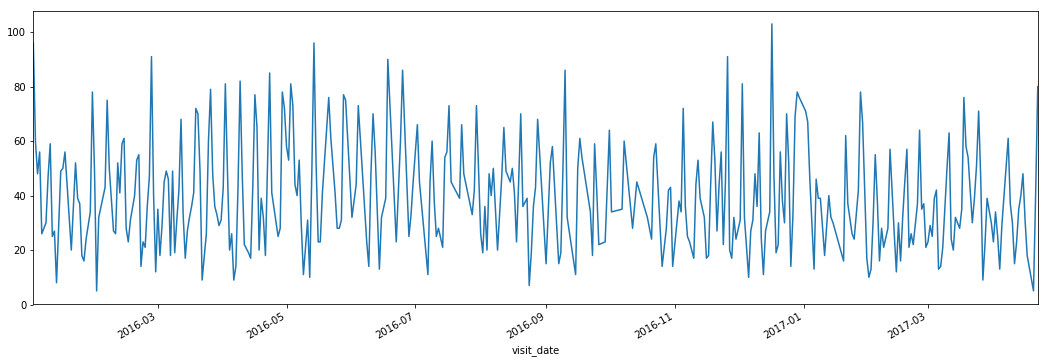

In [125]:
times.plot(figsize=(18,6))

In [126]:
times.describe().transpose()

count    374.000000
mean      39.994652
std       19.748688
min        5.000000
25%       25.000000
50%       37.000000
75%       52.000000
max      103.000000
Name: visitors, dtype: float64

In [128]:
import statsmodels.api as sm


In [129]:
timeseries = times

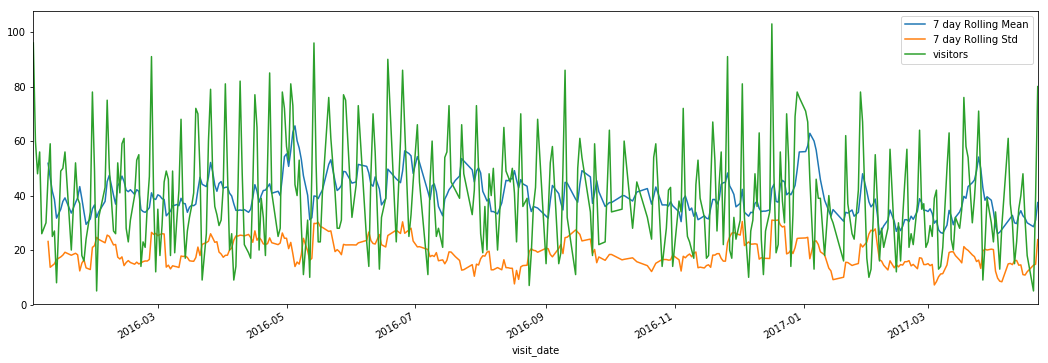

In [132]:
timeseries.rolling(7).mean().plot(label='7 day Rolling Mean')
timeseries.rolling(7).std().plot(label='7 day Rolling Std')
timeseries.plot(figsize=(18,6))
plt.legend()

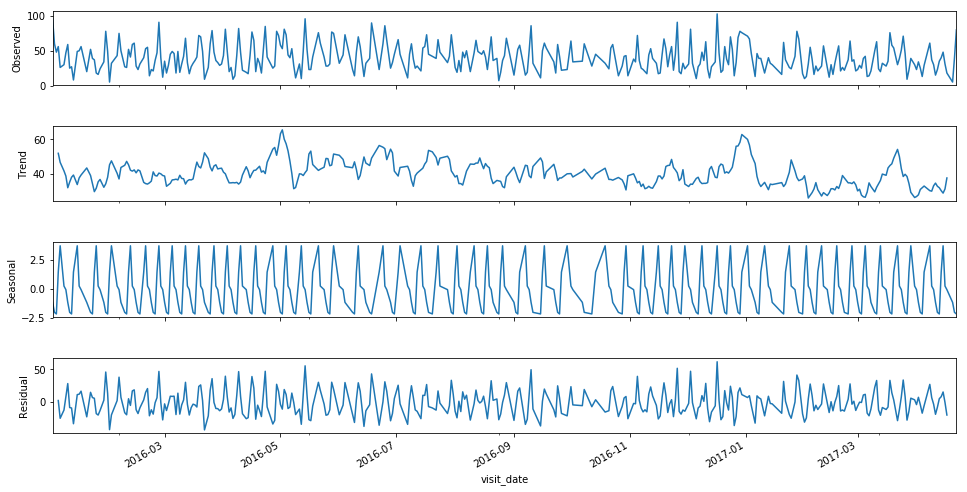

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(timeseries, freq=7)  #model-additive
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [140]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(timeseries)

In [141]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.18256879922
p-value : 6.40240224268e-08
#Lags Used : 9
Number of Observations Used : 364
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [142]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [151]:
timeseries['diff1'] = timeseries - timeseries.shift(1)

In [157]:
type(timeseries)

pandas.core.series.Series

In [158]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(np.array(timeseries), order=(7,0,0))

In [103]:
model7 = ARIMA(ts2, order=(7,0,0))

In [159]:
results = model1.fit()
print(results.summary())

ValueError: setting an array element with a sequence.